In [ ]:
!pip install scikit-learn-extra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Load the dataset
data_read = pd.read_csv("weatherHistory.csv", nrows = 15000)

# Selecting all features for clustering
X = data_read.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Apply K-medoids clustering for different values of K and calculate SSE
sse = []
max_k = 10
for k in range(1, max_k+1):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X_scaled)
    # Calculate sum of distances to nearest medoids
    distances = kmedoids.transform(X_scaled)
    sse.append(np.sum(np.min(distances, axis=1)))


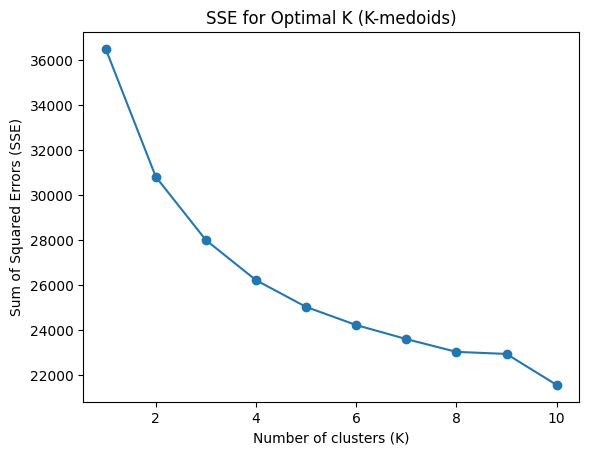

In [ ]:
# Plot SSE graph
plt.plot(range(1, max_k+1), sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE for Optimal K (K-medoids)')
plt.show()

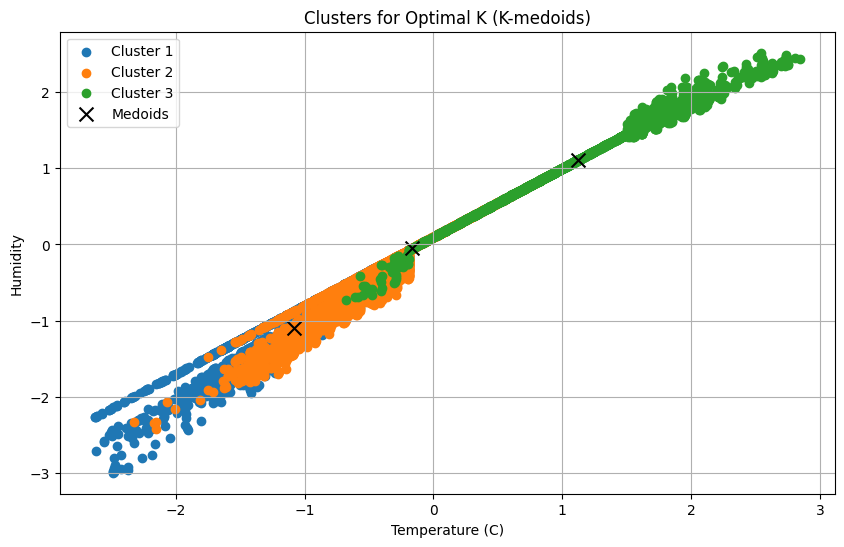

In [ ]:
#choosing optimal k
k = 3

# Apply K-medoids clustering with optimal K
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(X_scaled)

# Plot the clusters for the optimal K
plt.figure(figsize=(10, 6))

# Plot data points with different colors for each cluster
for cluster in range(k):
    cluster_data = X_scaled[kmedoids.labels_ == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

# Plot medoids
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Medoids')

plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Clusters for Optimal K (K-medoids)')
plt.legend()
plt.grid(True)
plt.show()